In [2]:

%matplotlib inline
import os
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import SimpleRNN

from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_squared_error
import FinanceDataReader as fdr

Using TensorFlow backend.


In [3]:
pandf = fdr.DataReader("HSI","2009.01.01","2019.01.01")


C:\Program Files\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


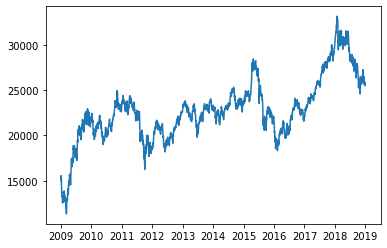

In [4]:
plt.plot(pandf["Close"])

In [5]:
# convert nparray
nparr = pandf.values
nparr.astype('float32')
print(nparr)

[[ 1.504281e+04  1.444822e+04  1.504281e+04  1.441212e+04  0.000000e+00
   4.550000e-02]
 [ 1.556331e+04  1.534933e+04  1.556331e+04  1.512832e+04  0.000000e+00
   3.460000e-02]
 [ 1.550951e+04  1.561247e+04  1.565161e+04  1.536793e+04  0.000000e+00
  -3.500000e-03]
 ...
 [ 2.547888e+04  2.581881e+04  2.592063e+04  2.544680e+04  1.350000e+09
  -6.700000e-03]
 [ 2.550420e+04  2.550234e+04  2.560025e+04  2.541636e+04  1.260000e+09
   1.000000e-03]
 [ 2.584570e+04  2.573252e+04  2.591623e+04  2.568266e+04  8.520700e+08
   1.340000e-02]]


In [6]:
# normalization
scaler = MinMaxScaler(feature_range=(0, 1))
nptf = scaler.fit_transform(nparr)
nptf=nptf[:-1]

In [7]:
# split train, test

y=np.where(pandf["Change"].shift(-1).dropna()>0,1,0)
train_size = int(len(nptf) * 0.7)
y_train=y[:train_size]
y_test=y[train_size:]
X_train = nptf[:train_size]
X_test = nptf[train_size:]


X_train

array([[0.16956937, 0.13331773, 0.15161727, 0.142329  , 0.        ,
        0.78415094],
       [0.19343507, 0.17466709, 0.17556265, 0.17555954, 0.        ,
        0.70188679],
       [0.19096826, 0.18674183, 0.17962485, 0.18667707, 0.        ,
        0.41433962],
       ...,
       [0.47901515, 0.46338161, 0.46575535, 0.47774546, 0.18846695,
        0.45358491],
       [0.48077309, 0.47282197, 0.46571348, 0.48282934, 0.13292264,
        0.45433962],
       [0.49042804, 0.47385443, 0.47644727, 0.48727152, 0.1533052 ,
        0.51320755]])

In [8]:
# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))


X_train

array([[[0.16956937, 0.13331773, 0.15161727, 0.142329  , 0.        ,
         0.78415094]],

       [[0.19343507, 0.17466709, 0.17556265, 0.17555954, 0.        ,
         0.70188679]],

       [[0.19096826, 0.18674183, 0.17962485, 0.18667707, 0.        ,
         0.41433962]],

       ...,

       [[0.47901515, 0.46338161, 0.46575535, 0.47774546, 0.18846695,
         0.45358491]],

       [[0.48077309, 0.47282197, 0.46571348, 0.48282934, 0.13292264,
         0.45433962]],

       [[0.49042804, 0.47385443, 0.47644727, 0.48727152, 0.1533052 ,
         0.51320755]]])

In [9]:
# simple lstm network learning
model = Sequential()
model.add(LSTM(36, input_shape=(1, 6)))
for i in range(2):
    model.add(Dense(36,activation='tanh'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
result=model.fit(X_train, y_train, epochs=100, batch_size=16,validation_split=0.3)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 1211 samples, validate on 520 samples
Epoch 1/100
1211/1211 [==============================] - 3s 2ms/step - loss: 0.6937 - acc: 0.4806 - val_loss: 0.6935 - val_acc: 0.4904
Epoch 2/100
1211/1211 [==============================] - 0s 267us/step - loss: 0.6930 - acc: 0.5161 - val_loss: 0.6933 - val_acc: 0.5096
Epoch 3/100
1211/1211 [==============================] - 0s 217us/step - loss: 0.6934 - acc: 0.5054 - val_loss: 0.6930 - val_acc: 0.4981
Epoch 4/100
1211/1211 [==============================] - 0s 179us/step - loss: 0.6930 - acc: 0.5070 - val_loss: 0.6935 - val_acc: 0.4981
Epoch 5/100
1211/1211 [==============================] - 0s 203us/step - loss: 0.6928 - acc: 0.5128 - val_loss: 0.6925 - val_acc: 0.5096
Epoch 6/100
1211/1211 [==============================] - 0s 278us/step - loss: 0.6932 - acc: 0

Epoch 54/100
1211/1211 [==============================] - 0s 285us/step - loss: 0.6912 - acc: 0.5351 - val_loss: 0.6926 - val_acc: 0.5154
Epoch 55/100
1211/1211 [==============================] - 0s 192us/step - loss: 0.6914 - acc: 0.5310 - val_loss: 0.6945 - val_acc: 0.5154
Epoch 56/100
1211/1211 [==============================] - 0s 252us/step - loss: 0.6908 - acc: 0.5285 - val_loss: 0.6948 - val_acc: 0.5135
Epoch 57/100
1211/1211 [==============================] - 0s 253us/step - loss: 0.6910 - acc: 0.5343 - val_loss: 0.6958 - val_acc: 0.5154
Epoch 58/100
1211/1211 [==============================] - 0s 258us/step - loss: 0.6908 - acc: 0.5235 - val_loss: 0.6924 - val_acc: 0.5173
Epoch 59/100
1211/1211 [==============================] - 0s 270us/step - loss: 0.6913 - acc: 0.5202 - val_loss: 0.6926 - val_acc: 0.5173
Epoch 60/100
1211/1211 [==============================] - 0s 270us/step - loss: 0.6918 - acc: 0.5351 - val_loss: 0.6960 - val_acc: 0.5115
Epoch 61/100
1211/1211 [==========

In [10]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,np.where(model.predict(X_train)>0.5,1,0))

0.5251299826689775

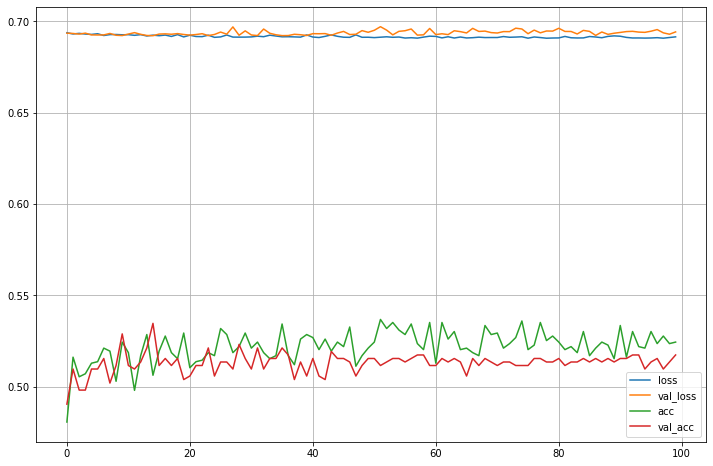

In [11]:
#-------------성과 측정 -------------
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,8))
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.plot(result.history['acc'])
plt.plot(result.history['val_acc'])
plt.legend(['loss','val_loss', 'acc','val_acc'])
plt.grid()
plt.show()

In [12]:
y_pred.shape

NameError: name 'y_pred' is not defined

In [17]:
y_pred=model.predict(X_test)
y_test_class=np.argmax(y_test)

In [18]:
y_pred2=np.where(y_pred>0.5,1,0)

In [19]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred2)

array([[285,  57],
       [338,  62]], dtype=int64)

In [20]:
y_test.shape

(742,)

In [23]:
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred2))

0.23892100192678226


In [ ]:
y_test.shape

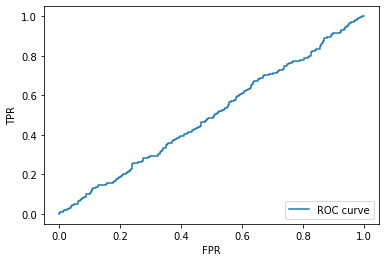

In [39]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred2)

from sklearn.metrics import roc_curve
y_prob=model.predict_proba(X_test)
fpr,tpr,thresholds=roc_curve(y_test,y_prob)
plt.plot(fpr,tpr,label="ROC curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
close_zero=np.argmin(np.abs(thresholds))
plt.legend(loc=4)

In [36]:
y_prob=model.predict_proba(X_test)